In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

In [2]:
csv_path = "devices_v3.csv"

<h1 dir="rtl">
    ۱. آمار توصیفی
</h1>

<h2 dir="rtl">
    ۱.۱ توزیع دستگاههای تلفن همراه در بین فناوریهای مختلف شبکه چگونه است؟
</h2>

In [3]:
# 1) read date
cols = ["name", "type", "released_date","network_technology"]
df = pd.read_csv(csv_path, usecols=cols)

In [4]:
# 2) filtering by type and released_date
df = df[df["type"] == "phone"]
df = df[df["released_date"] > 2010]

In [5]:
# 3) Group the data by network technology and count the number of devices
grouped = df.groupby("network_technology").count()
# 4) Rename the column to "count"
grouped = grouped.rename(columns={"name": "count"})

In [6]:
# 5) Calculate the total number of devices
total = grouped["count"].sum()

In [7]:
# 6) Calculate the percentage of devices for each network technology
grouped["percentage"] = grouped["count"].apply(lambda x: x / total * 100)

In [8]:
# 7) Drop columns 'type' and 'released_date'
grouped = grouped.drop(['type', 'released_date'], axis=1)

In [9]:
# 8) get the cumulative count for each network technology
grouped = grouped.sort_values(by='network_technology', ascending=False)
grouped['cumulative_count'] = grouped['count'].cumsum()
grouped = grouped.sort_values(by='network_technology')

In [10]:
# 6) Calculate the percentage of devices for each network technology
total = grouped["cumulative_count"].sum()
grouped["percentage_cum"] = grouped["cumulative_count"].apply(lambda x: x / total * 100)

In [11]:
# 9) Print the distribution
print(grouped)

                    count  percentage  cumulative_count  percentage_cum
network_technology                                                     
2G                    309    9.043020              3417       37.344262
3G                    887   25.958443              3108       33.967213
4G                   1817   53.175300              2221       24.273224
5G                    404   11.823237               404        4.415301


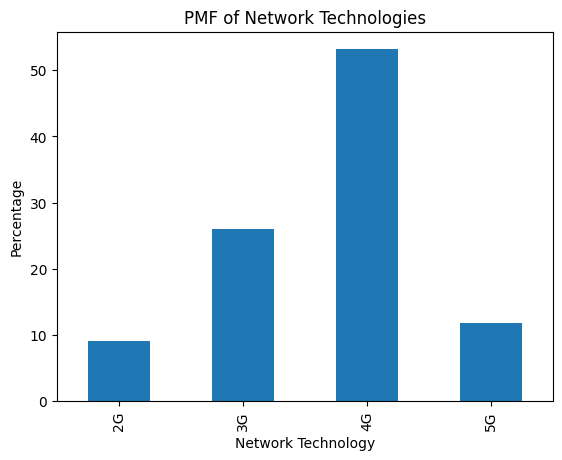

In [12]:
# 9) plot the distribution (pmf)
grouped['percentage'].plot(kind='bar')
# Add labels
plt.xlabel('Network Technology')
plt.ylabel('Percentage')
# Add title
plt.title('PMF of Network Technologies') 
# Display plot
plt.show()

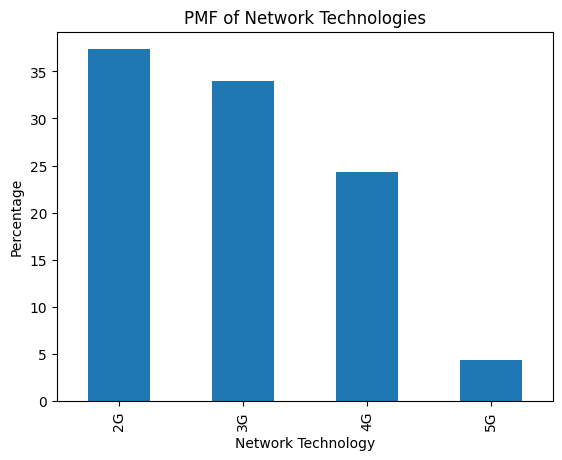

In [13]:
# 9) plot the distribution (pmf) - Another point of view
grouped['percentage_cum'].plot(kind='bar')
# Add labels
plt.xlabel('Network Technology')
plt.ylabel('Percentage')
# Add title
plt.title('PMF of Network Technologies') 
# Display plot
plt.show()

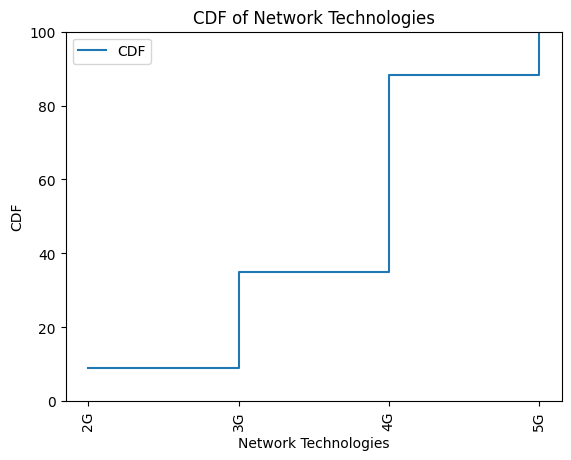

In [14]:
# 10) plot the distribution (cdf)
# Calculate cumulative sum of percentages
cdf = grouped['percentage'].cumsum()
# Create step function for CDF
x = cdf.index
y = cdf.values
# Plot CDF as a step function
plt.step(x, y, where='post', label='CDF')
# Customize plot
plt.ylabel('CDF')
plt.xlabel('Network Technologies')
plt.title('CDF of Network Technologies')
plt.xticks(x, grouped.index, rotation='vertical')
plt.legend()
plt.ylim([0, 100])
# Show the plot
plt.show()

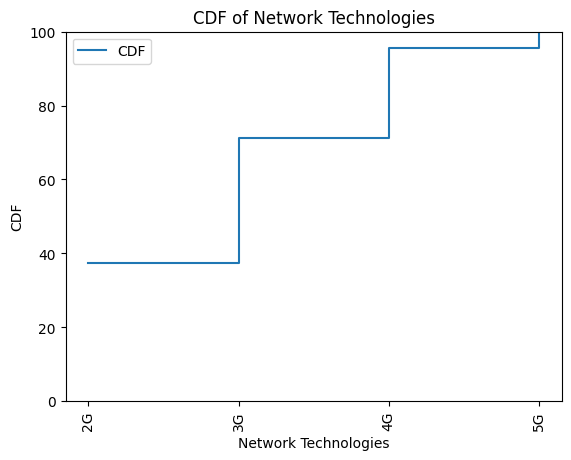

In [15]:
# 10) plot the distribution (cdf) - Another point of view
# Calculate cumulative sum of percentages
cdf = grouped['percentage_cum'].cumsum()
# Create step function for CDF
x = cdf.index
y = cdf.values
# Plot CDF as a step function
plt.step(x, y, where='post', label='CDF')
# Customize plot
plt.ylabel('CDF')
plt.xlabel('Network Technologies')
plt.title('CDF of Network Technologies')
plt.xticks(x, grouped.index, rotation='vertical')
plt.legend()
plt.ylim([0, 100])
# Show the plot
plt.show()

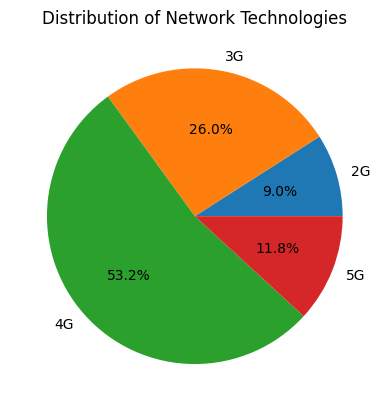

In [16]:
# 9) another plot ! 
# Plot a pie chart with labels and percentages
plt.pie(grouped['percentage'].values, labels=grouped['percentage'].index.values, autopct="%1.1f%%")
# Add a title
plt.title("Distribution of Network Technologies")
# Show the chart
plt.show()

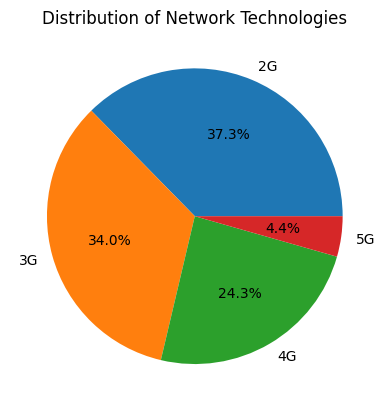

In [17]:
# 9) another plot ! - Another point of view
# Plot a pie chart with labels and percentages
plt.pie(grouped['percentage_cum'].values, labels=grouped['percentage_cum'].index.values, autopct="%1.1f%%")
# Add a title
plt.title("Distribution of Network Technologies")
# Show the chart
plt.show()

<h2 dir="rtl">
    ۱.۲  ماتریس همبستگی میان ستونهای ابعاد، اندازه، وزن، پیکسل، نسبت صفحه به بدنه، حجم ورودی
باطری و ppi چگونه خواهد بود؟
</h2>

In [18]:
# 1) read date 
cols = [
     "type", "length", "width", "height", 
    "weight", "resolution_l", "resolution_w", 
    "screen_size","screen_body_ratio", "battery_capacity", 
    "ppi", "released_date"
]
df = pd.read_csv(csv_path, usecols=cols)

In [19]:
# 2) filtering by type and released_date
df = df[df["type"] == "phone"]
df = df[df["released_date"] > 2010]

In [20]:
# 3) remove rows from df where a col has a null (NaN) => 246 rows will be omitted => 7% = It is reasonable
df = df[df['ppi'].notna()]
df = df[df['length'].notna()]
df = df[df['width'].notna()]
df = df[df['height'].notna()]
df = df[df['height'].notna()]
df = df[df['battery_capacity'].notna()]
df = df[df['screen_size'].notna()]
df = df[df['screen_body_ratio'].notna()]
df = df[df['weight'].notna()]

In [21]:
# 4) Drop columns 'type' and 'released_date'
df = df.drop(['type', 'released_date'], axis=1)

In [22]:
# 5) calcultae corr matrix
corr_matrix = df.corr()

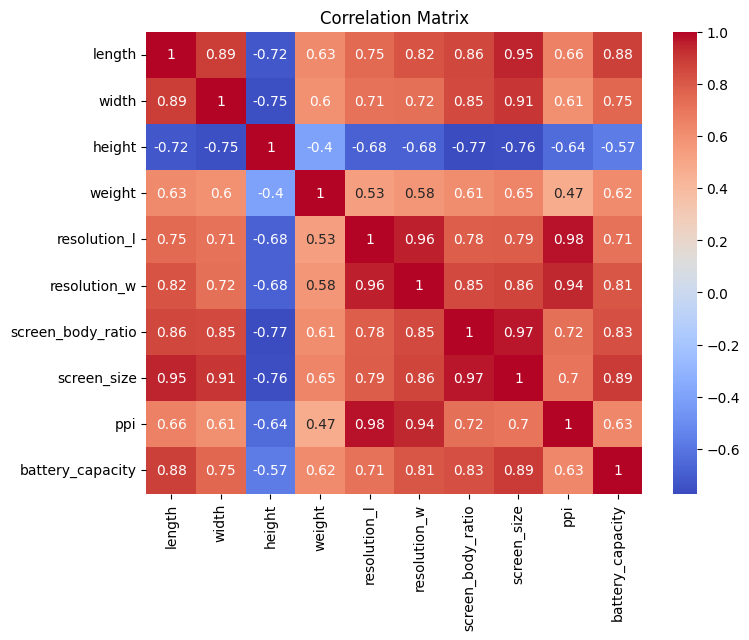

In [23]:
# 6) Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<h2 dir="rtl">
    ۱.۳  رایج ترین نوع سیم کارت مورد استفاده در دستگاههای تلفن همراه چیست؟
</h2>

In [24]:
# 1) read date 
cols = ["name", "type", "released_date", "sim_type"]
df = pd.read_csv(csv_path, usecols=cols)

In [25]:
# 2) filtering by type and released_date
df = df[df["type"] == "phone"]
df = df[df["released_date"] > 2010]

In [26]:
# 3) replace the NaN values with 'other' 
df['sim_type'].fillna('other', inplace=True)

In [27]:
# 4) Group the data by sim types and count the number of devices
grouped = df.groupby("sim_type").count()
# 5) Rename the column to "count"
grouped = grouped.rename(columns={"name": "count"})

In [28]:
# 6) Calculate the total number of devices
total = grouped["count"].sum()

In [29]:
# 7) Calculate the percentage of devices for each sim type
grouped["percentage"] = grouped["count"].apply(lambda x: x / total * 100)

In [30]:
# 8) Drop columns 'type' and 'released_date'
grouped = grouped.drop(['type', 'released_date'], axis=1)

In [31]:
# 9) Print the distribution
print(grouped)

          count  percentage
sim_type                   
micro       748   21.890547
mini        870   25.460931
nano       1684   49.282997
other       115    3.365525


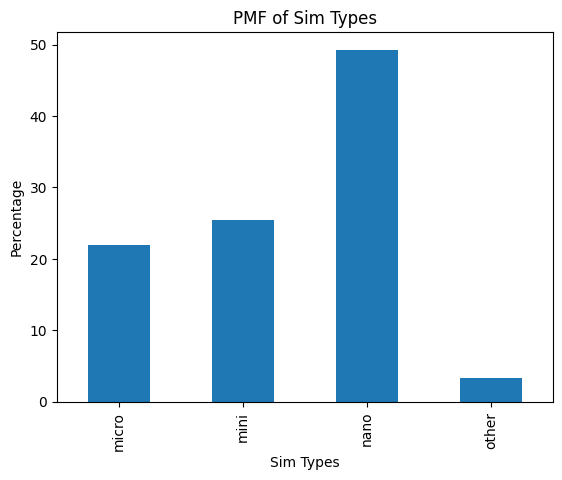

In [33]:
# 9) plot the distribution (pmf)
grouped['percentage'].plot(kind='bar')
# Add labels
plt.xlabel('Sim Types')
plt.ylabel('Percentage')
# Add title
plt.title('PMF of Sim Types') 
# Display plot
plt.show()

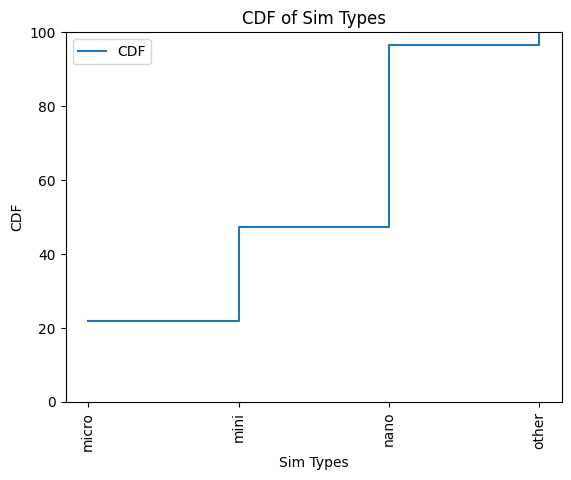

In [34]:
# 10) plot the distribution (cdf)
# Calculate cumulative sum of percentages
cdf = grouped['percentage'].cumsum()
# Create step function for CDF
x = cdf.index
y = cdf.values
# Plot CDF as a step function
plt.step(x, y, where='post', label='CDF')
# Customize plot
plt.ylabel('CDF')
plt.xlabel('Sim Types')
plt.title('CDF of Sim Types')
plt.xticks(x, grouped.index, rotation='vertical')
plt.legend()
plt.ylim([0, 100])
# Show the plot
plt.show()

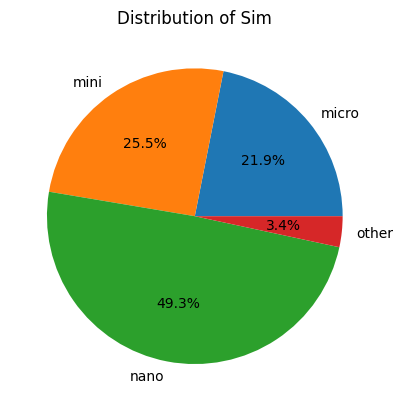

In [35]:
# 9) another plot ! 
# Plot a pie chart with labels and percentages
plt.pie(grouped['percentage'].values, labels=grouped['percentage'].index.values, autopct="%1.1f%%")
# Add a title
plt.title("Distribution of Sim")
# Show the chart
plt.show()

In [36]:
# Another point of view
grouped = grouped.drop(index='other')
grouped = grouped.drop(columns='percentage', axis=1)

In [37]:
# 2) Calculate the total number of devices
total = grouped["count"].sum()
# 3) Calculate the percentage of devices for each sim type
grouped["percentage"] = grouped["count"].apply(lambda x: x / total * 100)

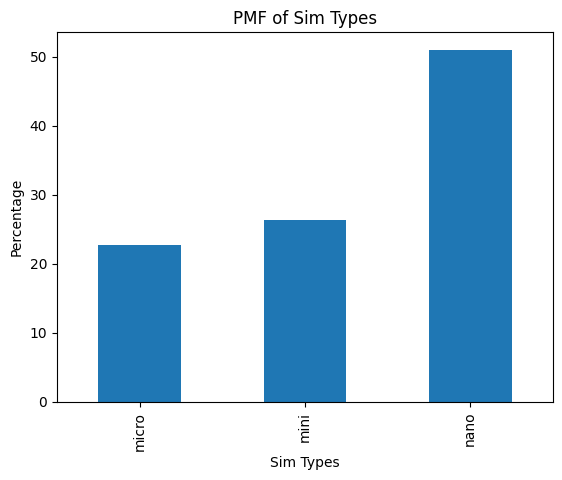

In [38]:
# 4) plot the distribution (pmf)
grouped['percentage'].plot(kind='bar')
# Add labels
plt.xlabel('Sim Types')
plt.ylabel('Percentage')
# Add title
plt.title('PMF of Sim Types') 
# Display plot
plt.show()

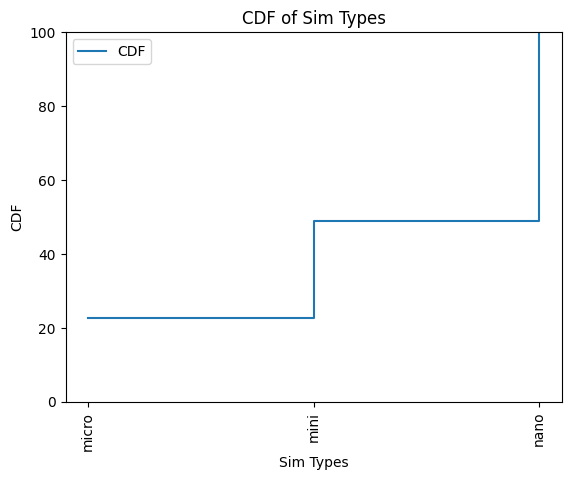

In [39]:
# 5) plot the distribution (cdf)
# Calculate cumulative sum of percentages
cdf = grouped['percentage'].cumsum()
# Create step function for CDF
x = cdf.index
y = cdf.values
# Plot CDF as a step function
plt.step(x, y, where='post', label='CDF')
# Customize plot
plt.ylabel('CDF')
plt.xlabel('Sim Types')
plt.title('CDF of Sim Types')
plt.xticks(x, grouped.index, rotation='vertical')
plt.legend()
plt.ylim([0, 100])
# Show the plot
plt.show()

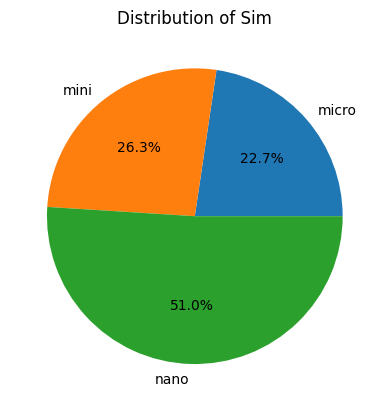

In [40]:
# 6) another plot ! 
# Plot a pie chart with labels and percentages
plt.pie(grouped['percentage'].values, labels=grouped['percentage'].index.values, autopct="%1.1f%%")
# Add a title
plt.title("Distribution of Sim")
# Show the chart
plt.show()

<h2 dir="rtl">
    ۱.۴  ده ورژن برتر اندروید از نظر تکرار استفاده در گوشیهای مختلف.
</h2>

In [41]:
# 1) read date 
cols = ["name", "os_type", "os_version", "type", "released_date"]
df = pd.read_csv(csv_path, usecols=cols)

In [42]:
# 2) filtering 
df = df[df["type"] == "phone"]
df = df[df["released_date"] > 2010]
df = df[df['os_type'] == 'Android']

In [43]:
# 3) standardize versions
def standardize_version(version):
    arr = version.split(".")
    if len(arr) == 3:
        if arr[1] == '0' and arr[2] == '0':
            return arr[0]
        if arr[1] != '0' and arr[2] == '0':
            return arr[0] + '.' + arr[1]
        else:
            return version
    elif len(arr) == 2:
        if arr[1] == '0' or arr[1] == '':
            return arr[0]
        else:
            return version
    elif len(arr) == 1:
        return version
        
df['os_version'] = df['os_version'].apply(standardize_version)

In [44]:
# 4) Group the data by Android version and count the number of phone models
grouped = df[["name", "os_version"]].groupby("os_version").count()
# Rename the column to "count"
grouped = grouped.rename(columns={"name": "count"})

In [45]:
# 5) Sort the data by the count in descending order and select the top ten rows
top_ten = grouped.sort_values(by="count", ascending=False).head(10)

In [46]:
# 6) Print the result
print(top_ten)

            count
os_version       
10            280
11            234
9             209
4.4.2         185
12            158
6             157
8.1           121
2.3           111
13            107
7             105


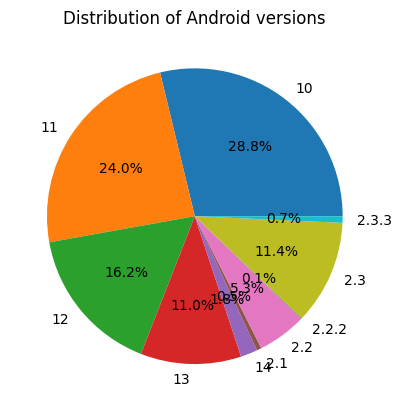

In [47]:
# 7) plot the result 
# Plot a pie chart with labels and percentages
grouped["percentage"] = grouped["count"].apply(lambda x: x / total * 100)
plt.pie(grouped['percentage'].values[:10], labels=grouped['percentage'].index.values[:10], autopct="%1.1f%%")
# Add a title
plt.title("Distribution of Android versions")
# Show the chart
plt.show()

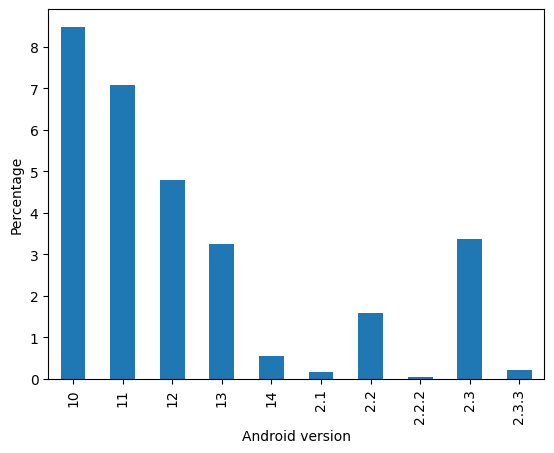

In [48]:
# 4) plot the distribution (pmf)
grouped['percentage'][:10].plot(kind='bar')
# Add labels
plt.xlabel('Android version')
plt.ylabel('Percentage')
# Display plot
plt.show()

<h2 dir="rtl">
    ۱.۵  ابتدا ۵۰ گوشی گران قیمت را پیدا کرده و سپس مشخص کنید چه تعداد از آنها متعلق به اندروید،
iOS و یا سایر سیستم عاملها هستند. آیا ارتباط مستقیمی بین قیمت و مدل سیستم عامل آن
مشاهده میکنید؟
</h2>

In [49]:
# 1) read date 
cols = ["type", "released_date", "os_type", "price"]
df = pd.read_csv(csv_path, usecols=cols)

In [50]:
# 2) filtering by type and released_date
df = df[df["type"] == "phone"]
df = df[df["released_date"] > 2010]

In [51]:
# 3) Drop columns 'type' and 'released_date'
df = df.drop(['type', 'released_date'], axis=1)

In [52]:
# 4) remove rows from df where a col has a null (NaN) => 345 rows will be omitted => 11% it is a little high!
df = df[df['price'].notna()]
df = df[df['os_type'].notna()]

In [53]:
# 5) Sort the data by the price in descending order and select the top 50 rows
top_50 = df.sort_values(by="price", ascending=False).head(50)

In [54]:
grouped = top_50.groupby("os_type").count()
grouped = grouped.rename(columns={"price": "count"})
grouped

,count
os_type,
Android,43
HarmonyOS,6
iOS,1


<p dir="rtl">
نتیجه اصلی این است که در میان 50 گوشی گران قیمت، اندروید با اکثریت قابل توجهی از 43 دستگاه، بر بازار مسلط است. HarmonyOS با 6 گوشی در رتبه دوم قرار دارد و iOS با تنها 1 گوشی در میان 50 دستگاه گران قیمت، نمایندگی بسیار کمی دارد.</p>

<h2 dir="rtl">
    ۱.۶  توزیع گوشیها بر حسب برند را رسم کنید.
</h2>

In [55]:
# 1) read date 
df = pd.read_csv(csv_path, usecols=["name", "brand"])

In [56]:
# 2) Group the data by brand and count the number of devices
grouped = df.groupby("brand").count()
# 3) Rename the column to "count"
grouped = grouped.rename(columns={"name": "count"})

In [57]:
# 4) Calculate the total number of devices
total = grouped["count"].sum()

In [58]:
# 5) Calculate the percentage of devices for each network technology
grouped["percentage"] = grouped["count"].apply(lambda x: x / total * 100)

In [59]:
# 6) Print the distribution
print(grouped)

         count  percentage
brand                     
ALCATEL    409    7.164127
APPLE      118    2.066912
ASUS       200    3.503240
BLU        368    6.445963
HTC        287    5.027150
HUAWEI     441    7.724645
INFINIX    125    2.189525
LENOVO     246    4.308986
LG         666   11.665791
NOKIA      575   10.071816
SAMSUNG   1374   24.067262
SONY       158    2.767560
XIAOMI     376    6.586092
ZTE        366    6.410930


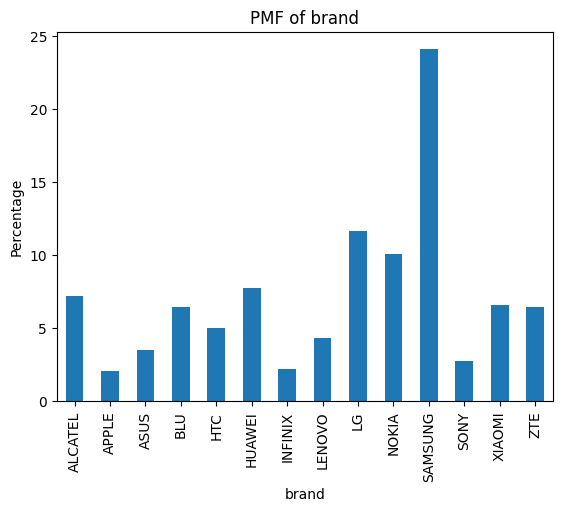

In [60]:
# 7) plot the distribution (pmf)
grouped['percentage'].plot(kind='bar')
# Add labels
plt.xlabel('brand')
plt.ylabel('Percentage')
# Add title
plt.title('PMF of brand') 
# Display plot
plt.show()

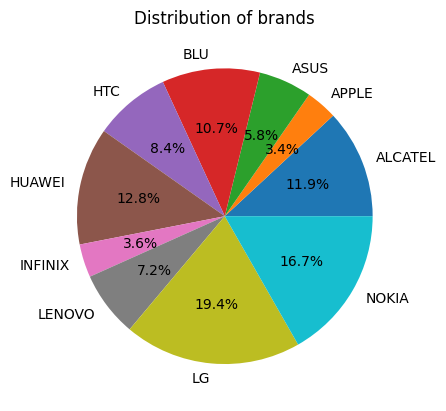

In [61]:
# 6) plot the result 
# Plot a pie chart with labels and percentages
grouped["percentage"] = grouped["count"].apply(lambda x: x / total * 100)
plt.pie(grouped['percentage'].values[:10], labels=grouped['percentage'].index.values[:10], autopct="%1.1f%%")
# Add a title
plt.title("Distribution of brands")
# Show the chart
plt.show()

<h2 dir="rtl">
    ۱.۷  اسکتر پلات density ppi را بر اساس سال برای سه برند سامسونگ، اپل و شیائومی رسم کنید، آیا
روند خاصی در آن دیده میشود؟
</h2>

In [62]:
# 1) read date 
cols = ["type", "released_date", "brand", "ppi"]
df = pd.read_csv(csv_path, usecols=cols)

In [63]:
# 2) filtering by type and released_date
df = df[df["type"] == "phone"]
df = df[df["released_date"] > 2010]

In [64]:
# 3) remove rows from df where a col has a null (NaN) => 15 rows will be omitted
df = df[df['ppi'].notna()]

In [65]:
# 4) Filter the DataFrame to include only the desired brands
brands = ["APPLE", "SAMSUNG", "XIAOMI"]
df = df[df['brand'].isin(brands)]

In [66]:
# 5) Drop columns 'type' 
df = df.drop(['type'], axis=1)

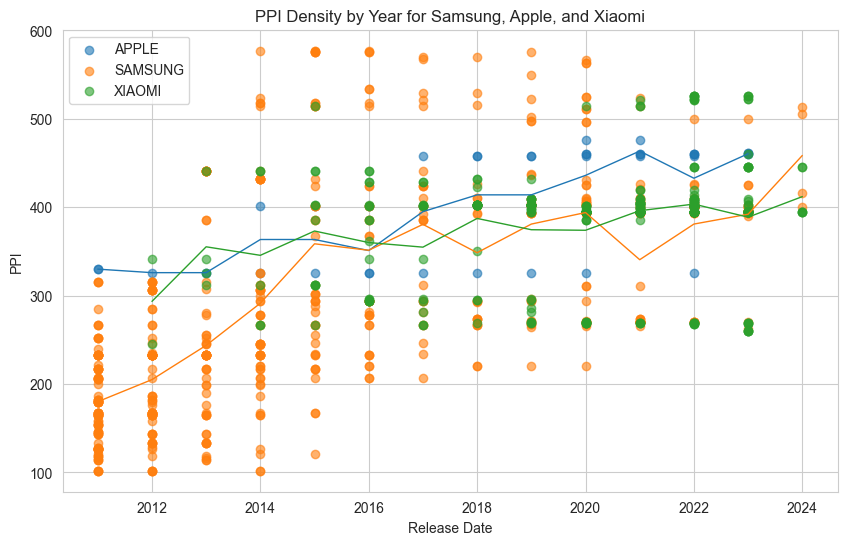

In [67]:
# 6) Prepare the data for plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Calculate the mean PPI for each brand and year
mean_ppi = df.groupby(['brand', df['released_date']]).mean().reset_index()[['brand', 'released_date', 'ppi']]

# Loop through each brand and plot a scatter plot
for brand in brands:
    brand_df = df[df['brand'] == brand]
    plt.scatter(brand_df['released_date'], brand_df['ppi'], label=brand, alpha=0.6)
    
    brand_mean = mean_ppi[mean_ppi['brand'] == brand]
    brand_mean = brand_mean.sort_values('released_date')
    plt.plot(brand_mean['released_date'], brand_mean['ppi'], linestyle='-', linewidth=1)
    
# Add labels and title
plt.xlabel('Release Date')
plt.ylabel('PPI')
plt.title('PPI Density by Year for Samsung, Apple, and Xiaomi')

# Add a legend
plt.legend()

# Display the plot
plt.show()

<p dir="rtl">
    اگر روند صعودی یا نزولی واضحی در طول زمان وجود داشته باشد، ممکن است نشان دهنده این باشد که برند به طور مداوم در حال افزایش یا کاهش تراکم PPI در دستگاه های خود است.
</p>
<p dir="rtl">
   اگر نقاط داده پراکنده تر باشند و از یک الگوی واضح پیروی نکنند، ممکن است نشان دهد که هیچ روند ثابتی در تراکم PPI برای آن برند وجود ندارد.
</p>

<h2 dir="rtl">
    ۱.۸  توزیع ستون های کمی داده ها را رسم کنید.
</h2>

In [68]:
# 1) read date 
df = pd.read_csv(csv_path)
numerical_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'id']
df = pd.read_csv(csv_path, usecols = numerical_cols + ["type"])

In [69]:
# 2) filtering by type and released_date
df = df[df["type"] == "phone"]
df = df[df["released_date"] > 2010]

In [70]:
# 3) Remove rows with missing values in numerical columns
df = df.dropna(subset=numerical_cols)

In [71]:
# 4) Drop columns 'type' and 'released_date'
df = df.drop(['type'], axis=1)

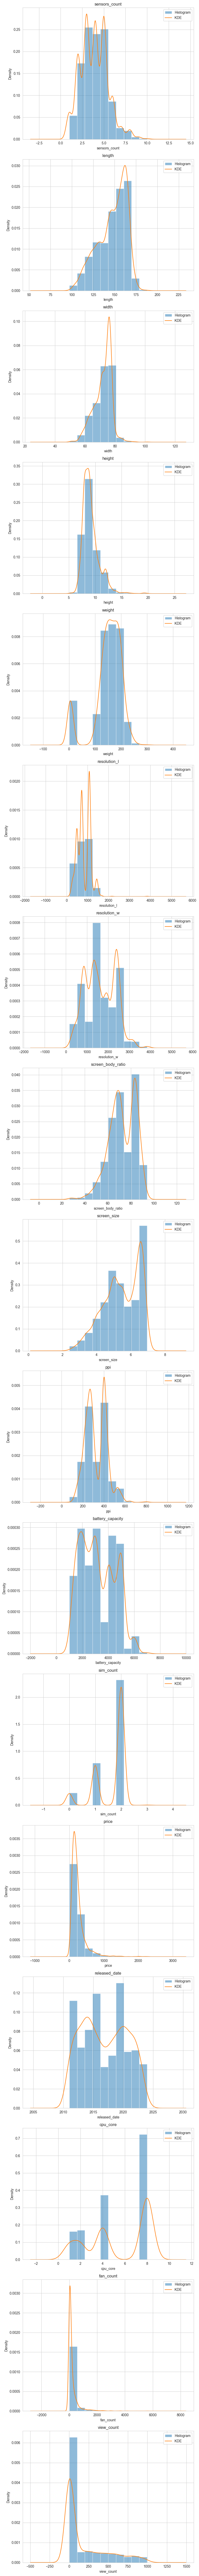

In [190]:
# 5) Create a figure and axis
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8, 6 * len(numerical_cols)))
# Plot the distribution of each numerical column
for i, col in enumerate(numerical_cols):
    ax = axes[i] if len(numerical_cols) > 1 else axes
    df[col].plot(kind='hist', ax=ax, density=True, alpha=0.5, label='Histogram')
    df[col].plot.kde(ax=ax, label='KDE')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

<h1 dir="rtl">
    ۲. تخمین
</h1>

<h2 dir="rtl">
    ۲.۱ میانگین قیمت محصولات سال ۲۰۲۳ برندهای اپل، سامسونگ، هواوی، شیائومی و نوکیا را به دست
آورید. طبق این نمونه برداری بازه ی اطمینان ۹۸ درصد را برای قیمت گوشی در سال ۲۰۲۳ محاسبه نمایید.
</h2>

In [72]:
# 1) read date 
cols = ["type", "released_date", "brand", "price"]
df = pd.read_csv(csv_path, usecols=cols)

In [73]:
# 2) filtering by type and released_date
brands = ['APPLE', 'SAMSUNG', 'HUAWEI', 'XIAOMI', 'NOKIA']
df = df[(df['type'] == "phone") & (df['brand'].isin(brands)) & (df['released_date'] == 2023)]

In [74]:
# 3) remove rows from df where a col has a null (NaN) => 2 rows will be omitted => 1.8%
df = df[df['price'].notna()]

In [75]:
# 4) Calculate the average price for each brand.
average_prices = df.groupby('brand')['price'].mean()

In [196]:
average_prices 

brand
APPLE      796.527778
HUAWEI     538.703704
NOKIA      141.388889
SAMSUNG    233.040318
XIAOMI     267.200602
Name: price, dtype: float64

In [76]:
# 5) Calculate the overall average price across all brands.
overall_mean_price = df['price'].mean()
overall_mean_price

310.13563339834326

In [77]:
# 6) Calculate the sample standard deviation.
sample_std_dev = df['price'].std()
sample_std_dev

268.683670540118

In [78]:
# 7) Calculate the 98% confidence interval for the price of phones in 2023.
n = df.shape[0]  # Number of observations
z_score = 2.326  # Z-score for 98% confidence level (two-tailed)

margin_of_error = z_score * (sample_std_dev / np.sqrt(n))
lower_bound = overall_mean_price - margin_of_error
upper_bound = overall_mean_price + margin_of_error
print(f"\n98% Confidence Interval for the price of phones in 2023 (normal method): ({lower_bound:.2f}, {upper_bound:.2f})")


98% Confidence Interval for the price of phones in 2023 (normal method): (249.43, 370.84)


In [79]:
# Function to calculate the Modified Z-score
def modified_z_score(data):
    median_price = data['price'].median()
    mad = abs(data['price'] - median_price).median()
    modified_z_score = 0.6745 * (data['price'] - median_price) / mad
    return modified_z_score

In [80]:
# Loop through each brand and detect and replace outliers
for brand in ["SAMSUNG", "XIAOMI"]:
    brand_df = df[df['brand'] == brand].copy() 
    
    # Calculate the Modified Z-score for the 'price' column
    brand_df['modified_z_score'] = modified_z_score(brand_df)
    
    # Detect and replace outliers based on the Modified Z-score
    threshold = 3.5  # Adjust the threshold as needed
    brand_df.loc[abs(brand_df['modified_z_score']) > threshold, 'price'] = brand_df['price'].median()
    
    # Update the original DataFrame with the modified 'price' values
    df.loc[df['brand'] == brand, 'price'] = brand_df['price']

/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


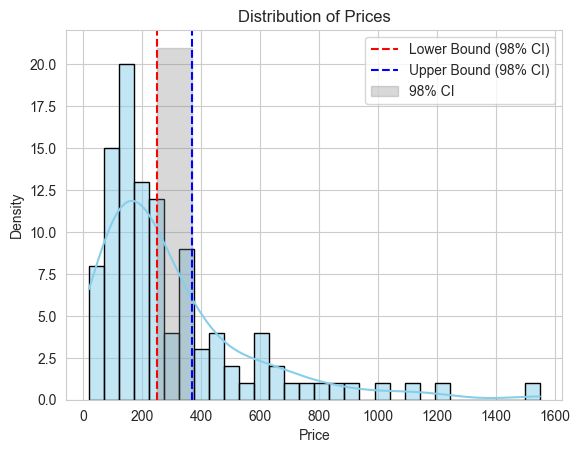

In [81]:
# Create a KDE plot
sns.histplot(data=df, x='price', bins=30, kde=True, color='skyblue', edgecolor='black')

# Plot vertical lines for the bounds
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (98% CI)')
plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound (98% CI)')

# Alternatively, you can shade the area between the bounds
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=lower_bound, x2=upper_bound, color='gray', alpha=0.3, label='98% CI')
# Add labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Prices')
# Add legend
plt.legend()
# Display the plot
plt.show()

In [82]:
prices = df['price'].values
# Calculate the sample mean and standard deviation
mean_price = prices.mean()
std_dev = prices.std()
n = len(prices)

# Calculate the t-statistic for the 98% confidence level (two-tailed)
alpha = 0.02  # Significance level (1 - confidence level)
dof = n - 1  # Degrees of freedom
t_stat = t.ppf(1 - alpha / 2, dof)

# Calculate the margin of error
margin_of_error = t_stat * (std_dev / np.sqrt(n))

# Calculate the confidence interval
lower_bound = mean_price - margin_of_error
upper_bound = mean_price + margin_of_error

print(f"98% Confidence Interval for the price (Pivotal method): ({lower_bound:.2f}, {upper_bound:.2f})")

98% Confidence Interval for the price (Pivotal method): (236.94, 358.77)
